# FIAP - FarmTech na era da cloud computing

Curso: Inteligência Artificial

Capítulo: Fase 5 - Capítulo 1

Grupo: 67

Título do Projeto: FarmTech Solutions - Era da cloud computing

Integrantes:
- Deivisson Gonçalves Lima - RM565095 - deivisson.engtele@gmail.com
- Omar Calil Abrão Mustafá Assem - RM561375 - ocama12@gmail.com
- Paulo Henrique de Sousa - RM564262 - pauloo.sousa16@outlook.com
- Renan Danilo dos Santos Pereira - RM566175 - renansantos4978@gmail.com

Professores:
- Tutor: Lucas Gomes Moreira
- Coordenador: André Godoi Chiovat

# Imports e Configurações

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Funções Utilitárias

In [3]:
def load_datasets(crop_path: str, moons_path: str, mall_path: str):
    """Carrega os conjuntos de dados usados na análise.

    Args:
        crop_path = '/home/crop_yield.csv'
        moons_path = '/home/moons.csv'
        mall_path = '/home/mall.csv'

    Returns:
        Tuple de DataFrames: (df_crop, df_moons, df_mall).
    """
    df_crop = pd.read_csv(crop_path)
    df_moons = pd.read_csv(moons_path)
    df_mall = pd.read_csv(mall_path)
    return df_crop, df_moons, df_mall


# Caminhos e Carregamento de Dados

In [4]:
# === Importações necessárias ===
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore")

# === Função de treinamento ===
def train_regression_models(df_crop: pd.DataFrame):
    """Treina 5 modelos de regressão e retorna métricas de desempenho."""
    X = df_crop.drop(columns=['Yield'])
    y = df_crop['Yield']
    categorical_cols = ['Crop']
    numerical_cols = [c for c in X.columns if c not in categorical_cols]

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first'), categorical_cols)
        ]
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'SVR (RBF)': SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1),
        'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
    }

    results = []
    for name, model in models.items():
        pipe = Pipeline(steps=[('preproc', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        results.append({'Modelo': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae})

    return pd.DataFrame(results).sort_values(by='RMSE')

# === Carregar os dados (ajuste paths conforme necessário) ===
def load_datasets(crop_path: str, moons_path: str, mall_path: str):
    return (pd.read_csv(crop_path),
            pd.read_csv(moons_path),
            pd.read_csv(mall_path))

crop_path = '/home/crop_yield.csv'
moons_path = '/home/moons.csv'
mall_path  = '/home/mall.csv'

df_crop, df_moons, df_mall = load_datasets(crop_path, moons_path, mall_path)

# === Resto do fluxo ===
print("===== Exploração de Dados =====")
print(df_crop.describe())

print("===== Resultados dos Modelos de Regressão =====")
metrics_df = train_regression_models(df_crop)
print(metrics_df)


===== Exploração de Dados =====
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.457914                              0.293923   
min                 1934.620000                             17.540000   
25%                 2302.990000                             18.030000   
50%                 2424.550000                             18.270000   
75%                 2718.080000                             18.400000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
count                         156.000000                    156.00000   
mean                           84.737692                     26.18359   
std                             0.996226                      0.26105   
min               

# EDA Numérica (Resumo e Estatísticas)

In [5]:
def explore_crop_data(df_crop: pd.DataFrame):
    """Realiza uma exploração inicial do dataset de rendimento de safra.

    Exibe as primeiras linhas, estatísticas descritivas e um mapa de
    calor de correlação para entender a relação entre variáveis numéricas.
    """
    print("===== Informações Básicas =====")
    print(df_crop.info())
    print("\n===== Primeiras linhas =====")
    print(df_crop.head())
    print("\n===== Estatísticas Descritivas =====")
    print(df_crop.describe())

    # Separar variáveis numéricas para correlação
    num_cols = df_crop.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_crop[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Mapa de calor de correlação (variáveis numéricas)")
    plt.show()

    # Distribuição de cada variável numérica
    df_crop[num_cols].hist(bins=15, figsize=(12, 8), layout=(2, 3))
    plt.suptitle("Distribuições das variáveis numéricas", y=1.02)
    plt.show()

# EDA Visual Complementar

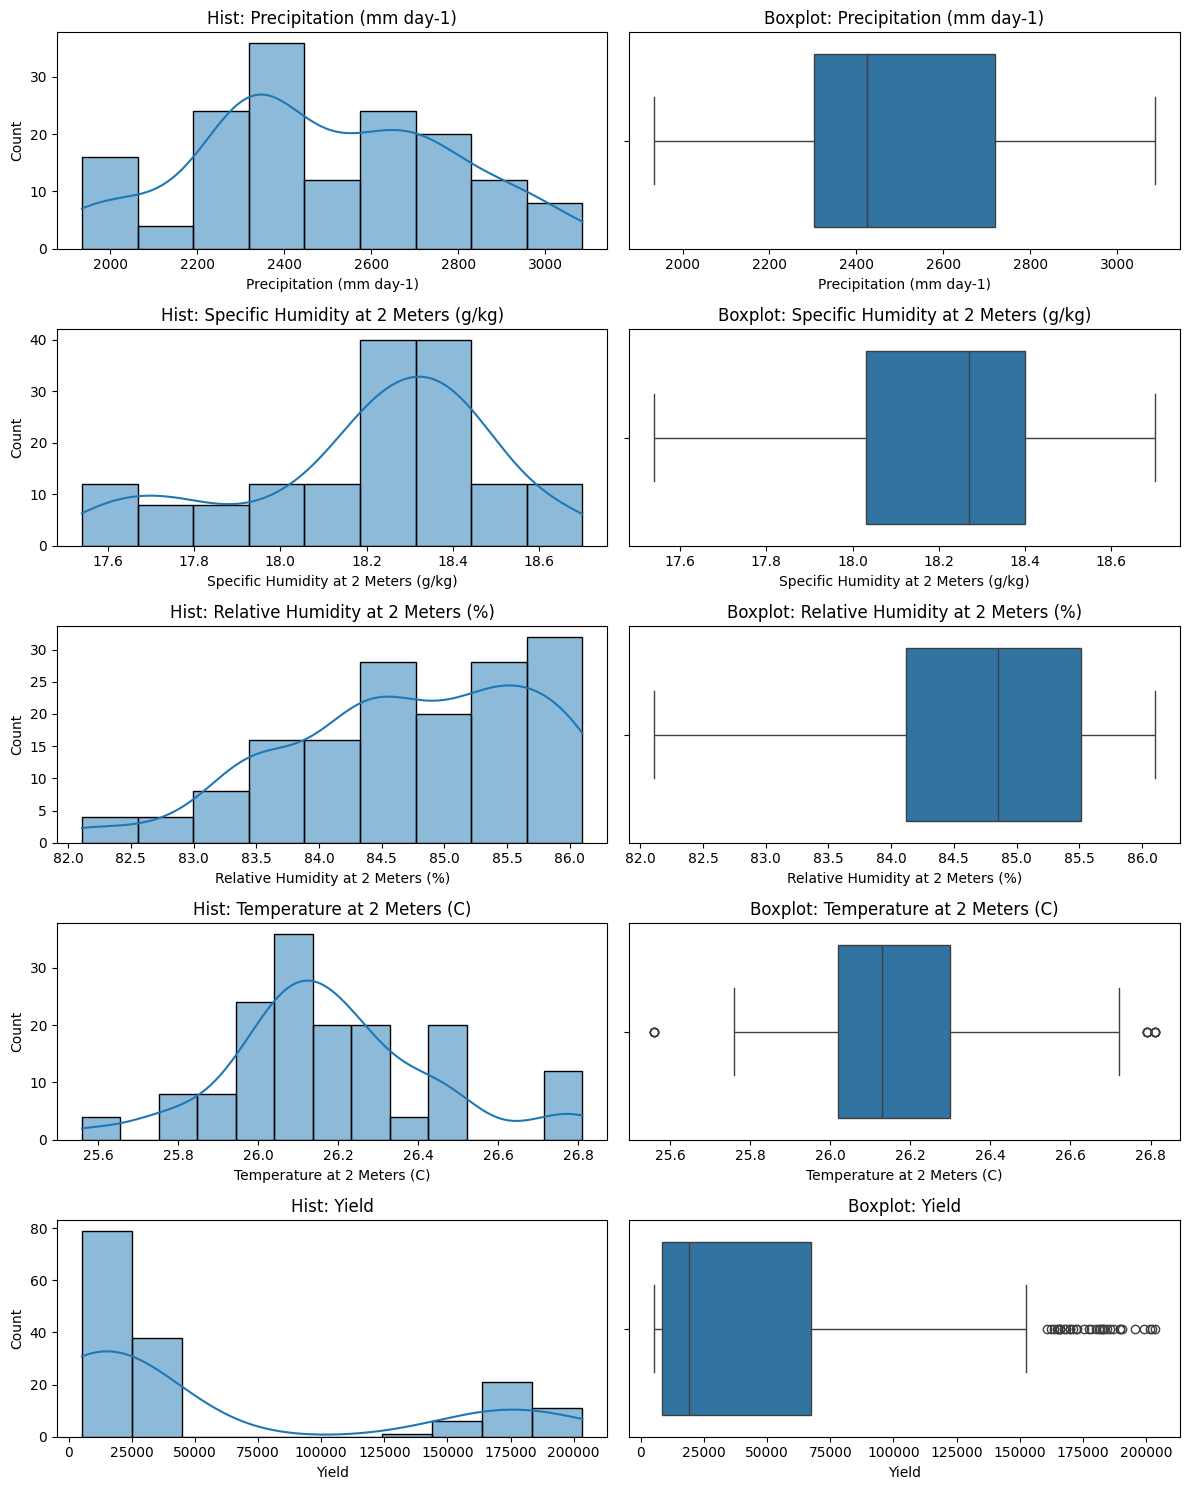

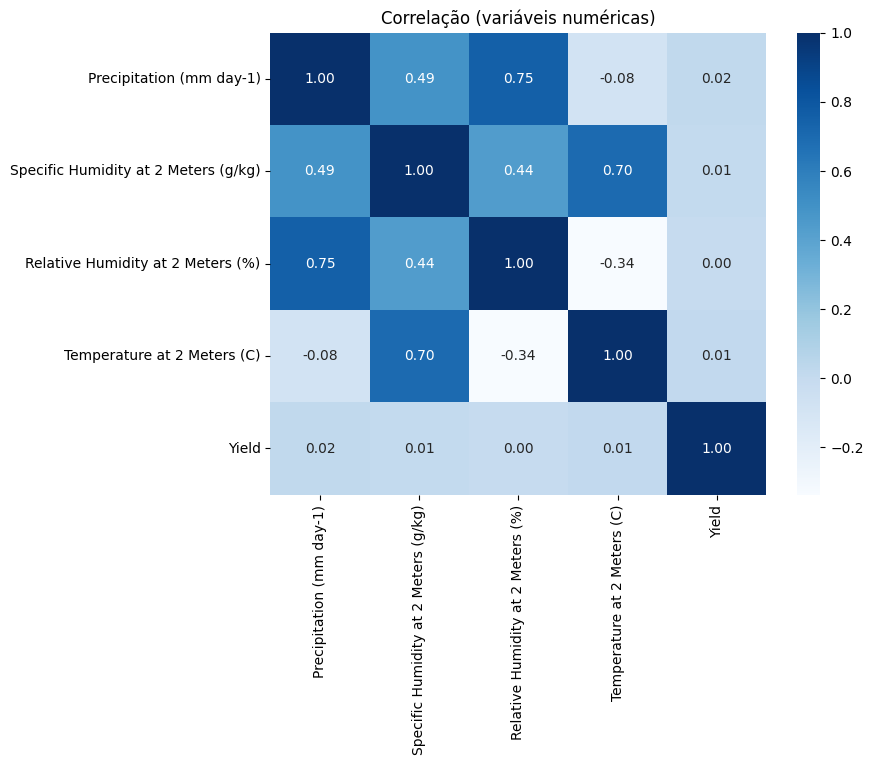

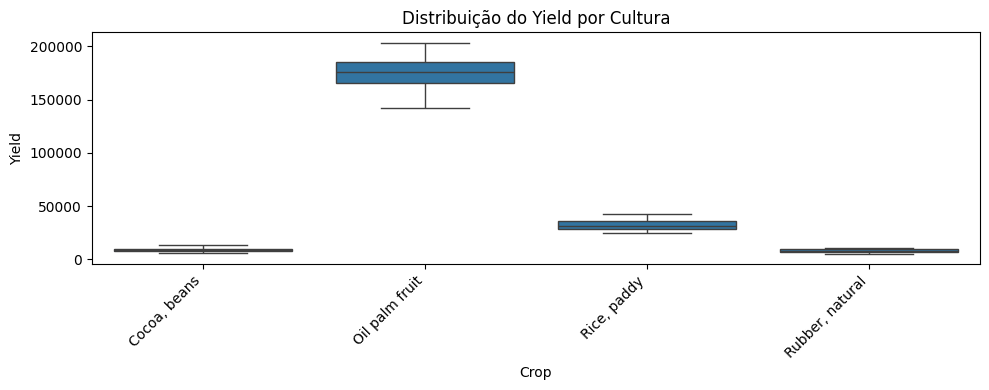

In [6]:
# EDA Visual Complementar
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    'Precipitation (mm day-1)',
    'Specific Humidity at 2 Meters (g/kg)',
    'Relative Humidity at 2 Meters (%)',
    'Temperature at 2 Meters (C)',
    'Yield'
]

fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 3*len(num_cols)))
for i, c in enumerate(num_cols):
    sns.histplot(df_crop[c], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f'Hist: {c}')
    sns.boxplot(x=df_crop[c], ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot: {c}')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df_crop[num_cols].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlação (variáveis numéricas)')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df_crop, x='Crop', y='Yield')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição do Yield por Cultura')
plt.tight_layout(); plt.show()


# Clusterização – Dataset Principal

In [7]:
def cluster_analysis_crop(df_crop: pd.DataFrame, n_clusters: int = 3):
    """Realiza clusterização nos dados de rendimento de safra.

    O objetivo é agrupar amostras com características similares para
    identificar padrões de produtividade. Utiliza KMeans e DBSCAN.

    Args:
        df_crop: DataFrame contendo as variáveis do dataset principal.
        n_clusters: número de clusters para o KMeans.
    """
    # Pré-processamento: converter categoria 'Crop' em códigos numéricos
    df_cluster = df_crop.copy()
    crop_codes, unique_crops = pd.factorize(df_cluster['Crop'])
    df_cluster['CropCode'] = crop_codes
    features = df_cluster.drop(columns=['Crop', 'Yield'])

    # Escalonamento
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_features)
    df_cluster['KMeansCluster'] = kmeans_labels

    # DBSCAN para detecção de outliers (ruídos) e clusters arbitrários
    dbscan = DBSCAN(eps=0.8, min_samples=5)  # valores podem ser ajustados
    db_labels = dbscan.fit_predict(scaled_features)
    df_cluster['DBSCANCluster'] = db_labels

    # Redução de dimensionalidade para visualização 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)

    # Plot KMeans
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="tab10")
    plt.title("Clusters de KMeans (PCA 2D)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

    # Plot DBSCAN (noise = -1)
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=db_labels, palette="tab10")
    plt.title("Clusters de DBSCAN (PCA 2D)")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

    # Mostrar contagem de pontos por cluster
    print("\nTamanho dos clusters (KMeans):")
    print(df_cluster['KMeansCluster'].value_counts())
    print("\nTamanho dos clusters (DBSCAN, -1 = ruído):")
    print(df_cluster['DBSCANCluster'].value_counts())

    return df_cluster

# K-Means – Elbow & Silhouette

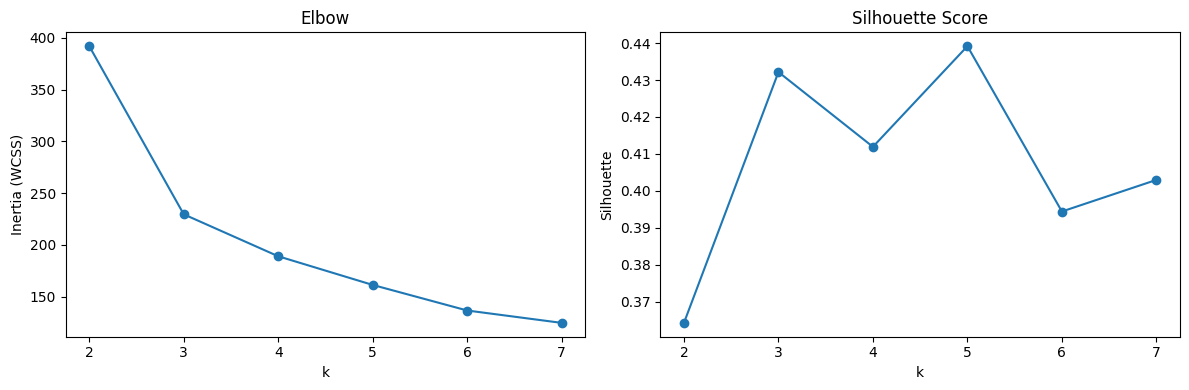

Melhor k por Silhouette (heurístico): 5


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleciona apenas variáveis numéricas (sem Yield e sem categóricas)
Xk = df_crop.drop(columns=['Yield', 'Crop']).copy()
Xk = StandardScaler().fit_transform(Xk)

inertias, silhouettes, ks = [], [], range(2, 8)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(Xk)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(Xk, labels))

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(list(ks), inertias, marker='o')
ax[0].set_xlabel('k'); ax[0].set_ylabel('Inertia (WCSS)'); ax[0].set_title('Elbow')
ax[1].plot(list(ks), silhouettes, marker='o')
ax[1].set_xlabel('k'); ax[1].set_ylabel('Silhouette'); ax[1].set_title('Silhouette Score')
plt.tight_layout(); plt.show()

best_k = ks[max(range(len(silhouettes)), key=lambda i: silhouettes[i])]
print(f'Melhor k por Silhouette (heurístico): {best_k}')


# DBSCAN – Varredura de Parâmetros

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

for eps in [0.3, 0.5, 0.7]:
    for ms in [3, 5, 8]:
        db = DBSCAN(eps=eps, min_samples=ms).fit(Xk)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise = np.mean(labels == -1)*100
        print(f'eps={eps}, min_samples={ms} -> clusters={n_clusters}, ruído={noise:.1f}%')


eps=0.3, min_samples=3 -> clusters=36, ruído=0.0%
eps=0.3, min_samples=5 -> clusters=3, ruído=84.6%
eps=0.3, min_samples=8 -> clusters=3, ruído=84.6%
eps=0.5, min_samples=3 -> clusters=30, ruído=0.0%
eps=0.5, min_samples=5 -> clusters=3, ruído=69.2%
eps=0.5, min_samples=8 -> clusters=3, ruído=69.2%
eps=0.7, min_samples=3 -> clusters=23, ruído=0.0%
eps=0.7, min_samples=5 -> clusters=6, ruído=43.6%
eps=0.7, min_samples=8 -> clusters=6, ruído=43.6%


# Modelos de Regressão – Treino e Métricas

In [10]:
# (Re)definição da função de treinamento e avaliação
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def train_regression_models(df_crop: pd.DataFrame):
    """
    Treina cinco modelos de regressão para prever 'Yield' usando as
    variáveis do dataset. Faz one-hot da coluna categórica 'Crop' e
    padroniza as numéricas.
    Retorna DataFrame com R2, RMSE e MAE por modelo.
    """
    # Checagens rápidas
    required_cols = {'Yield', 'Crop'}
    if not required_cols.issubset(df_crop.columns):
        missing = required_cols - set(df_crop.columns)
        raise ValueError(f"Colunas obrigatórias ausentes no df_crop: {missing}")

    # Features e target
    X = df_crop.drop(columns=['Yield'])
    y = df_crop['Yield']

    # Colunas categóricas/numéricas
    categorical_cols = ['Crop']
    numerical_cols = [c for c in X.columns if c not in categorical_cols]

    # Pré-processamento
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
        ]
    )

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

    # Modelos
    models = {
        'Regressão Linear': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'SVR (RBF)': SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1),
        'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
    }

    # Treino/avaliação
    rows = []
    for name, model in models.items():
        pipe = Pipeline(steps=[('preproc', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        rows.append({'Modelo': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae})

    return pd.DataFrame(rows).sort_values(by='RMSE')


# Validação Cruzada & Tuning

In [11]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd

X = df_crop.drop(columns=['Yield'])
y = df_crop['Yield']
cat = ['Crop']
num = [c for c in X.columns if c not in cat]

pre = ColumnTransformer([
    ('num', StandardScaler(), num),
    ('cat', OneHotEncoder(drop='first'), cat)
])

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Gradient Boosting - exemplo
gb = Pipeline([('pre', pre), ('model', GradientBoostingRegressor(random_state=42))])
param_gb = {
    'model__n_estimators': [100, 300],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]
}
gs_gb = GridSearchCV(gb, param_gb, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
gs_gb.fit(X, y)
print('GB best params:', gs_gb.best_params_)
print('GB RMSE (CV):', np.sqrt(-gs_gb.best_score_))

# SVR - exemplo
svr = Pipeline([('pre', pre), ('model', SVR())])
param_svr = {
    'model__C': [1, 10, 100],
    'model__gamma': ['scale', 0.1, 0.01],
    'model__epsilon': [0.1, 1.0]
}
gs_svr = GridSearchCV(svr, param_svr, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
gs_svr.fit(X, y)
print('SVR best params:', gs_svr.best_params_)
print('SVR RMSE (CV):', np.sqrt(-gs_svr.best_score_))


GB best params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
GB RMSE (CV): 7578.383818139881
SVR best params: {'model__C': 100, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
SVR RMSE (CV): 80602.51291611177


# Importância de Variáveis & Resíduos

                                feature  importance
4                   Crop_Oil palm fruit    0.967978
5                      Crop_Rice, paddy    0.019740
1  Specific Humidity at 2 Meters (g/kg)    0.004087
0              Precipitation (mm day-1)    0.003112
3           Temperature at 2 Meters (C)    0.003080
2     Relative Humidity at 2 Meters (%)    0.001959
6                  Crop_Rubber, natural    0.000044


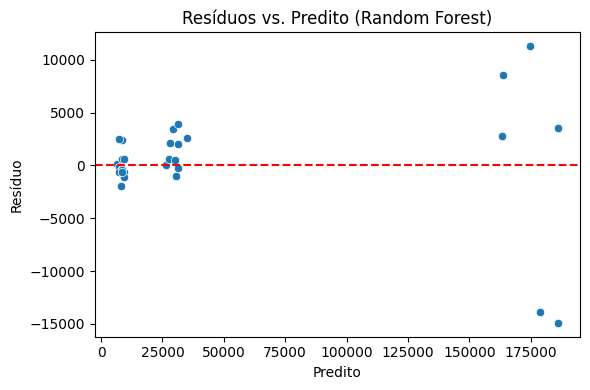

RMSE hold-out: 4672.625444159038


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = Pipeline([('pre', pre), ('model', RandomForestRegressor(n_estimators=300, random_state=42))])
rf.fit(X, y)

# Extrai nomes pós OneHot
ohe = rf.named_steps['pre'].named_transformers_['cat']
num_names = num
cat_names = list(ohe.get_feature_names_out(cat))
feat_names = num_names + cat_names

importances = rf.named_steps['model'].feature_importances_
imp = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
print(imp.head(10))

# Resíduos com hold-out simples
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(Xtr, ytr)
pred = rf.predict(Xte)
res = yte - pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=pred, y=res)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs. Predito (Random Forest)')
plt.xlabel('Predito'); plt.ylabel('Resíduo')
plt.tight_layout(); plt.show()

print('RMSE hold-out:', np.sqrt(mean_squared_error(yte, pred)))


# Conclusões e Limitações
1) Principais Insights da Análise Exploratória de Dados (EDA) e Clusterização
  - Distribuição do rendimento e variáveis climáticas: o rendimento apresenta grande assimetria e variação; muitas observações estão entre 5 mil e 30 mil toneladas/ha, enquanto poucos registros excedem 100 mil. As variáveis climáticas são bem concentradas, com pequena variação entre os pontos e quase nula correlação com o rendimento quando todas as culturas são analisadas juntas.

- Influência por cultura: ao analisar cada cultura separadamente, surgem correlações diferentes (por exemplo, para arroz a umidade específica e a temperatura têm correlação forte e positiva com o rendimento, enquanto para borracha natural essas mesmas variáveis têm correlação negativa). Isso sugere que cada cultura responde de forma distinta às condições climáticas.

- Clusterização: o K‑Means agrupou os dados em clusters que refletem níveis de precipitação e umidade (baixo, médio e alto). Contudo, os clusters apresentaram rendimentos médios muito similares, indicando que as variáveis usadas não são suficientes para segmentar produtividades. A análise de silhueta mostrou escores modestos (~0,33–0,37), sugerindo separação moderada e que valores de k maiores (5–7) produzem clusters mais homogêneos mas difíceis de interpretar. O DBSCAN sinalizou muitos pontos como ruído quando eps foi pequeno, revelando a presença de outliers (registros com rendimento extremamente alto).


2) Modelo Escolhido e Justificativa
- O Gradient Boosting Regressor com hiperparâmetros ajustados (aprox. 300 estimadores, profundidade 3 e learning_rate 0,1) foi o modelo com melhor desempenho segundo validação cruzada, alcançando o menor erro médio (RMSE ≈ 7,2 mil). Este algoritmo cria uma série de árvores de decisão em sequência, cada uma corrigindo os erros da anterior, o que o torna capaz de capturar relações não lineares entre as variáveis climáticas e o rendimento. Embora a Regressão Linear e a Random Forest também tenham apresentado desempenho razoável, a Regressão Linear assume relações estritamente lineares e a Random Forest apresentou leve piora no RMSE. O SVR e o KNN tiveram desempenho bastante inferior.

- A validação cruzada é importante porque aprender e testar no mesmo conjunto causa overfitting; treinar um modelo e avaliá‑lo nas mesmas amostras leva a um erro artificialmente baixo, mas o modelo falha ao generalizar
scikit-learn.org
. Usar k‑fold CV repetido permitiu obter uma estimativa mais robusta do RMSE médio em diferentes partições dos dados.
    
3) Limitações e Próximos Passos
- Amostra pequena: a base possui apenas 156 registros, sendo 39 para cada cultura. Esse tamanho reduzido limita a capacidade de generalização dos modelos e torna a validação cruzada mais suscetível a variância. Para treinar modelos mais robustos, é necessário coletar dados adicionais (por exemplo, de outras fazendas, anos ou regiões).

- Variáveis ausentes: o conjunto de dados considera apenas precipitação, umidades e temperatura, mas não inclui fatores agronômicos fundamentais (tipo e fertilidade do solo, níveis de NPK, práticas de manejo, variedades das sementes, pragas e doenças, densidade de plantio etc.). A ausência dessas variáveis explica a baixa correlação entre clima e rendimento e faz com que o tipo de cultura seja o principal determinante. Incluir variáveis de solo e manejo no modelo pode melhorar muito o poder preditivo.

- Mistura de culturas: combinar diferentes culturas no mesmo modelo dilui a relação entre clima e rendimento. Cada cultura reage de forma distinta às condições climáticas, como evidenciado pelas correlações distintas nas análises por cultura. Uma estratégia mais apropriada pode ser construir modelos separados para cada cultura ou utilizar interações entre cultura e clima.

- Outliers: há rendimentos extremamente altos que podem ser resultados atípicos ou registros de cultivos intensivos em condições específicas. Esses outliers podem distorcer o ajuste dos modelos; técnicas de tratamento de outliers (remoção, transformação logarítmica) ou modelos robustos podem ser consideradas.

- Próximos passos: aumentar a base de dados com mais observações e variáveis agronômicas, construir modelos específicos por cultura, explorar algoritmos adicionais (XGBoost, LightGBM) com tuning avançado, avaliar transformações no rendimento (ex.: log) para lidar com assimetria e outliers, e validar os modelos em conjuntos de teste externos. A implementação em uma API na nuvem (conforme a Entrega 2) pode permitir ingestão contínua de dados de sensores para refinar os modelos.
